In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pickle
import os.path
import seaborn as sns

In [2]:
network = 'resnet'
dataset = 'CIFAR10'

0.72775
0.73742
0.739
0.7220400000000001
0.71774
0.6882299999999999
0.65296
0.60138
0.5782499999999999


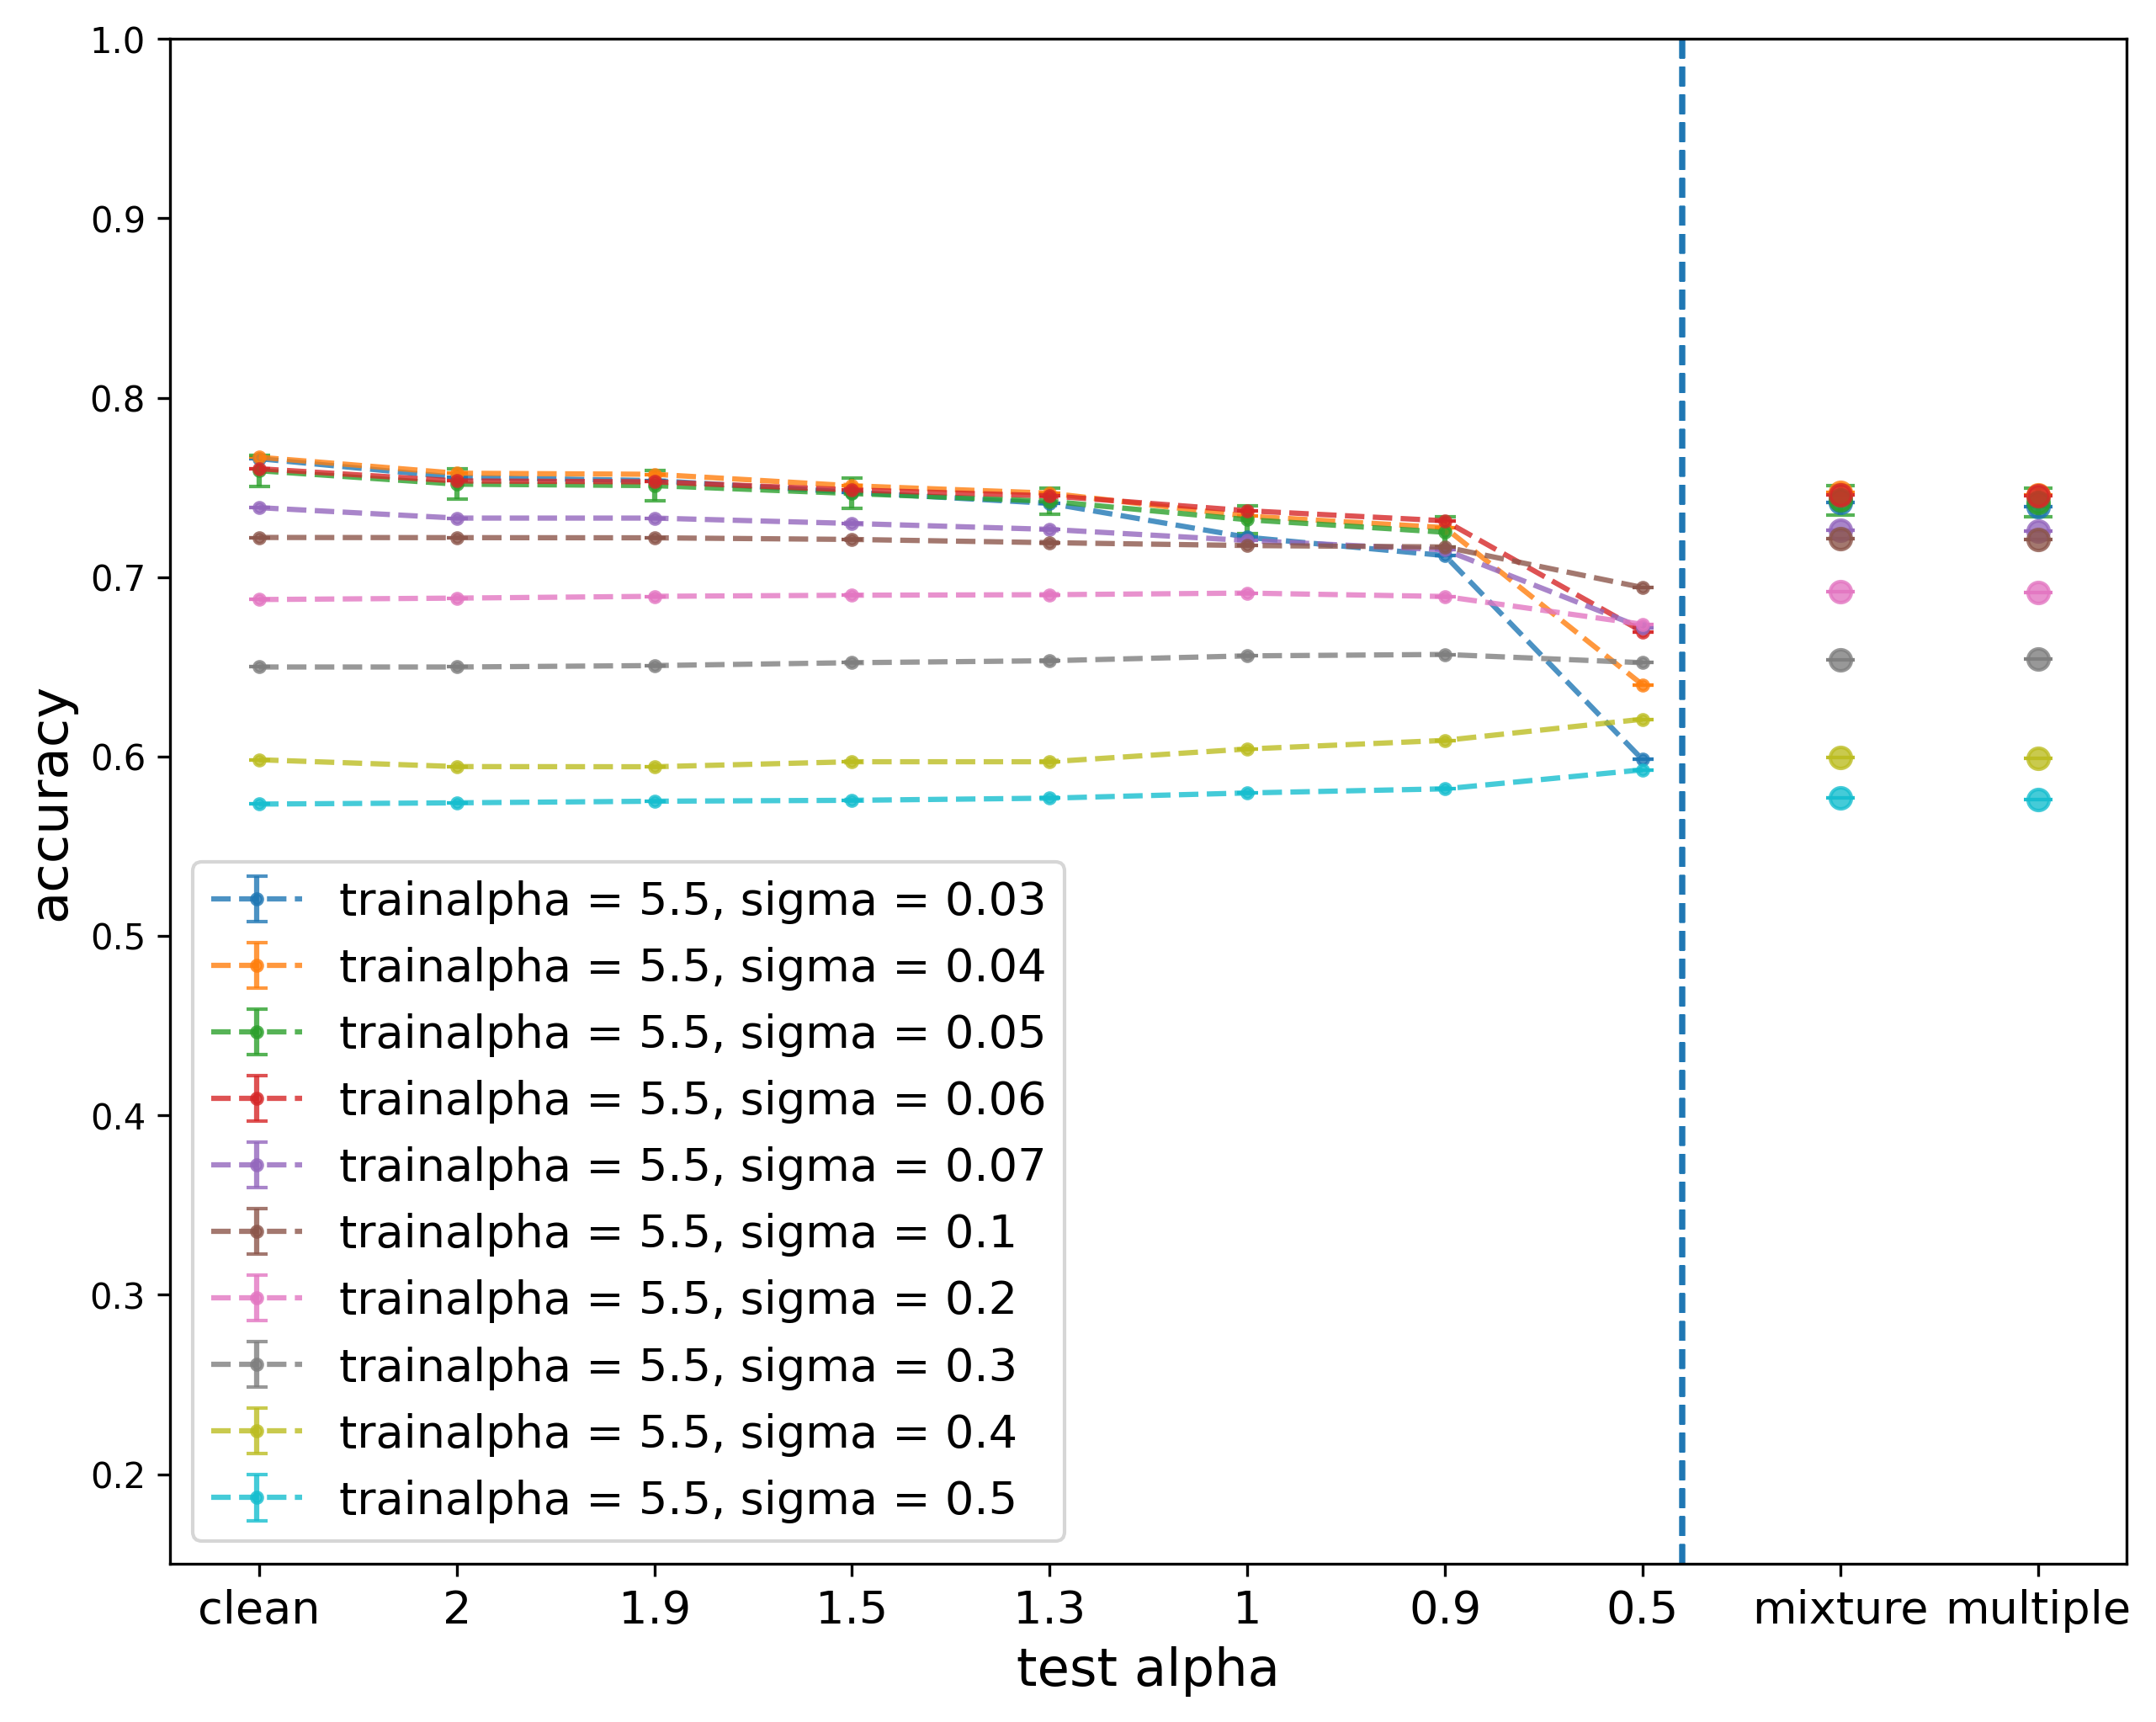

In [6]:

colors = sns.color_palette(n_colors = 10)
i=0
numfilters = 64
num_blocks=6
alpha =5.5
plt.figure(figsize=[10,8],dpi=300)
for train_sigma in [0.03,0.04,0.05,0.06,0.07,0.1,0.2,0.3,0.4,0.5]:
# for train_sigma in [0.1,0.15,0.2,0.03]:
    if train_sigma == 0.05:
        acc_path = './results_sigma/CIFAR10_resnet_numfilters16_b32_alpha{}_sigma{}_num_blocks6.txt'.format(alpha,train_sigma)
        f = open(acc_path, 'rb')
        try:
            acc = pickle.load(f)
        except:
            print("the file is empty, alpha={}".format(alpha))

        df = pd.DataFrame(acc)
        npdf = np.array(df)
        npdf = npdf.reshape(5,9)
        means = np.array(npdf.mean(axis=0).round(decimals=4))
        # means = means[:-1]
        # print(means)
        stds = np.array(npdf.std(axis=0).round(decimals=4))
        # stds = stds[:-1]
        x = ['mixture','multiple','clean','2', '1.9', '1.5', '1.3', '1', '0.9']
        labels = 'trainalpha = {}, sigma = {}'.format(alpha,train_sigma)
        plt.errorbar(x[2:],means[2:],yerr=stds[2:],capsize=3,fmt='--.',alpha=0.8,color = colors[i],label =labels)
        # plt.axvline(x.index('0.5')-2+0.2,linestyle='--')
        # plt.plot(x[:2],means[:2],'o',color=color)
        # plt.fill_between([x.index('multiple')+8-0.5,x.index('multiple')+8+0.5], means[1]-stds[1], means[1]+stds[1], color=color, alpha=0.2)
        # plt.fill_between([x.index('mixture')+8-0.5,x.index('mixture')+8+0.5], means[0]-stds[0], means[0]+stds[0], color=color, alpha=0.2)
        plt.errorbar(x[:2],means[:2],yerr = stds[:2],fmt='o',color = colors[i],capsize=4,alpha=0.8)
        i += 1    
    else:
        acc_path = "./results_sigma/CIFAR10_resnet_numfilters16_b32_alpha{}_trainsigma{}_testsigma0.05_num_blocks6.txt".format(alpha,train_sigma)
        f = open(acc_path, 'rb')
        try:
            acc = pickle.load(f)
        except:
            print("the file is empty, alpha={}".format(alpha))

        df = pd.DataFrame(acc)
        npdf = np.array(df)
        if npdf.shape==(50,1):
            npdf = npdf.reshape(5,10)
        else:
            npdf = npdf.reshape(1,10)
        means = np.array(npdf.mean(axis=0).round(decimals=4))
        # means = means[:-1]
        mmeans = np.mean(means)
        print(mmeans)
        stds = np.array(npdf.std(axis=0).round(decimals=4))
        # stds = stds[:-1]
        x = ['mixture','multiple','clean','2', '1.9', '1.5', '1.3', '1', '0.9','0.5']
        labels = 'trainalpha = {}, sigma = {}'.format(alpha,train_sigma)
        plt.errorbar(x[2:],means[2:],yerr=stds[2:],capsize=3,fmt='--.',alpha=0.8,color = colors[i],label =labels)
        plt.axvline(x.index('0.5')-2+0.2,linestyle='--')
        # plt.plot(x[:2],means[:2],'o',color=color)
        # plt.fill_between([x.index('multiple')+8-0.5,x.index('multiple')+8+0.5], means[1]-stds[1], means[1]+stds[1], color=color, alpha=0.2)
        # plt.fill_between([x.index('mixture')+8-0.5,x.index('mixture')+8+0.5], means[0]-stds[0], means[0]+stds[0], color=color, alpha=0.2)
        plt.errorbar(x[:2],means[:2],yerr = stds[:2],fmt='o',color = colors[i],capsize=4,alpha=0.8)
        i += 1    
    
plt.xticks(fontsize=13 )
plt.ylim([0.15, 1])
plt.xlabel("test alpha",fontsize=15)#横坐标名字
plt.ylabel("accuracy",fontsize=15)#纵坐标名字
plt.legend(loc=0,fontsize=13)#图例
# plt.title('{} ({}) \n numbers of blocks = {}, numbers of filters = {}'.format(dataset, network,num_blocks,numfilters))
# plt.savefig('../xq_results_robustness/0812figure/ecg20all_numfilters{}_numbers of blocks{}.png'.format(numfilters,num_blocks),bbox_inches='tight')
plt.show()

In [18]:
len(npdf)

50

0.43877
0.68622
0.7307400000000001
0.72775
0.6844600000000001
0.74251
0.7498299999999999
0.7357400000000001


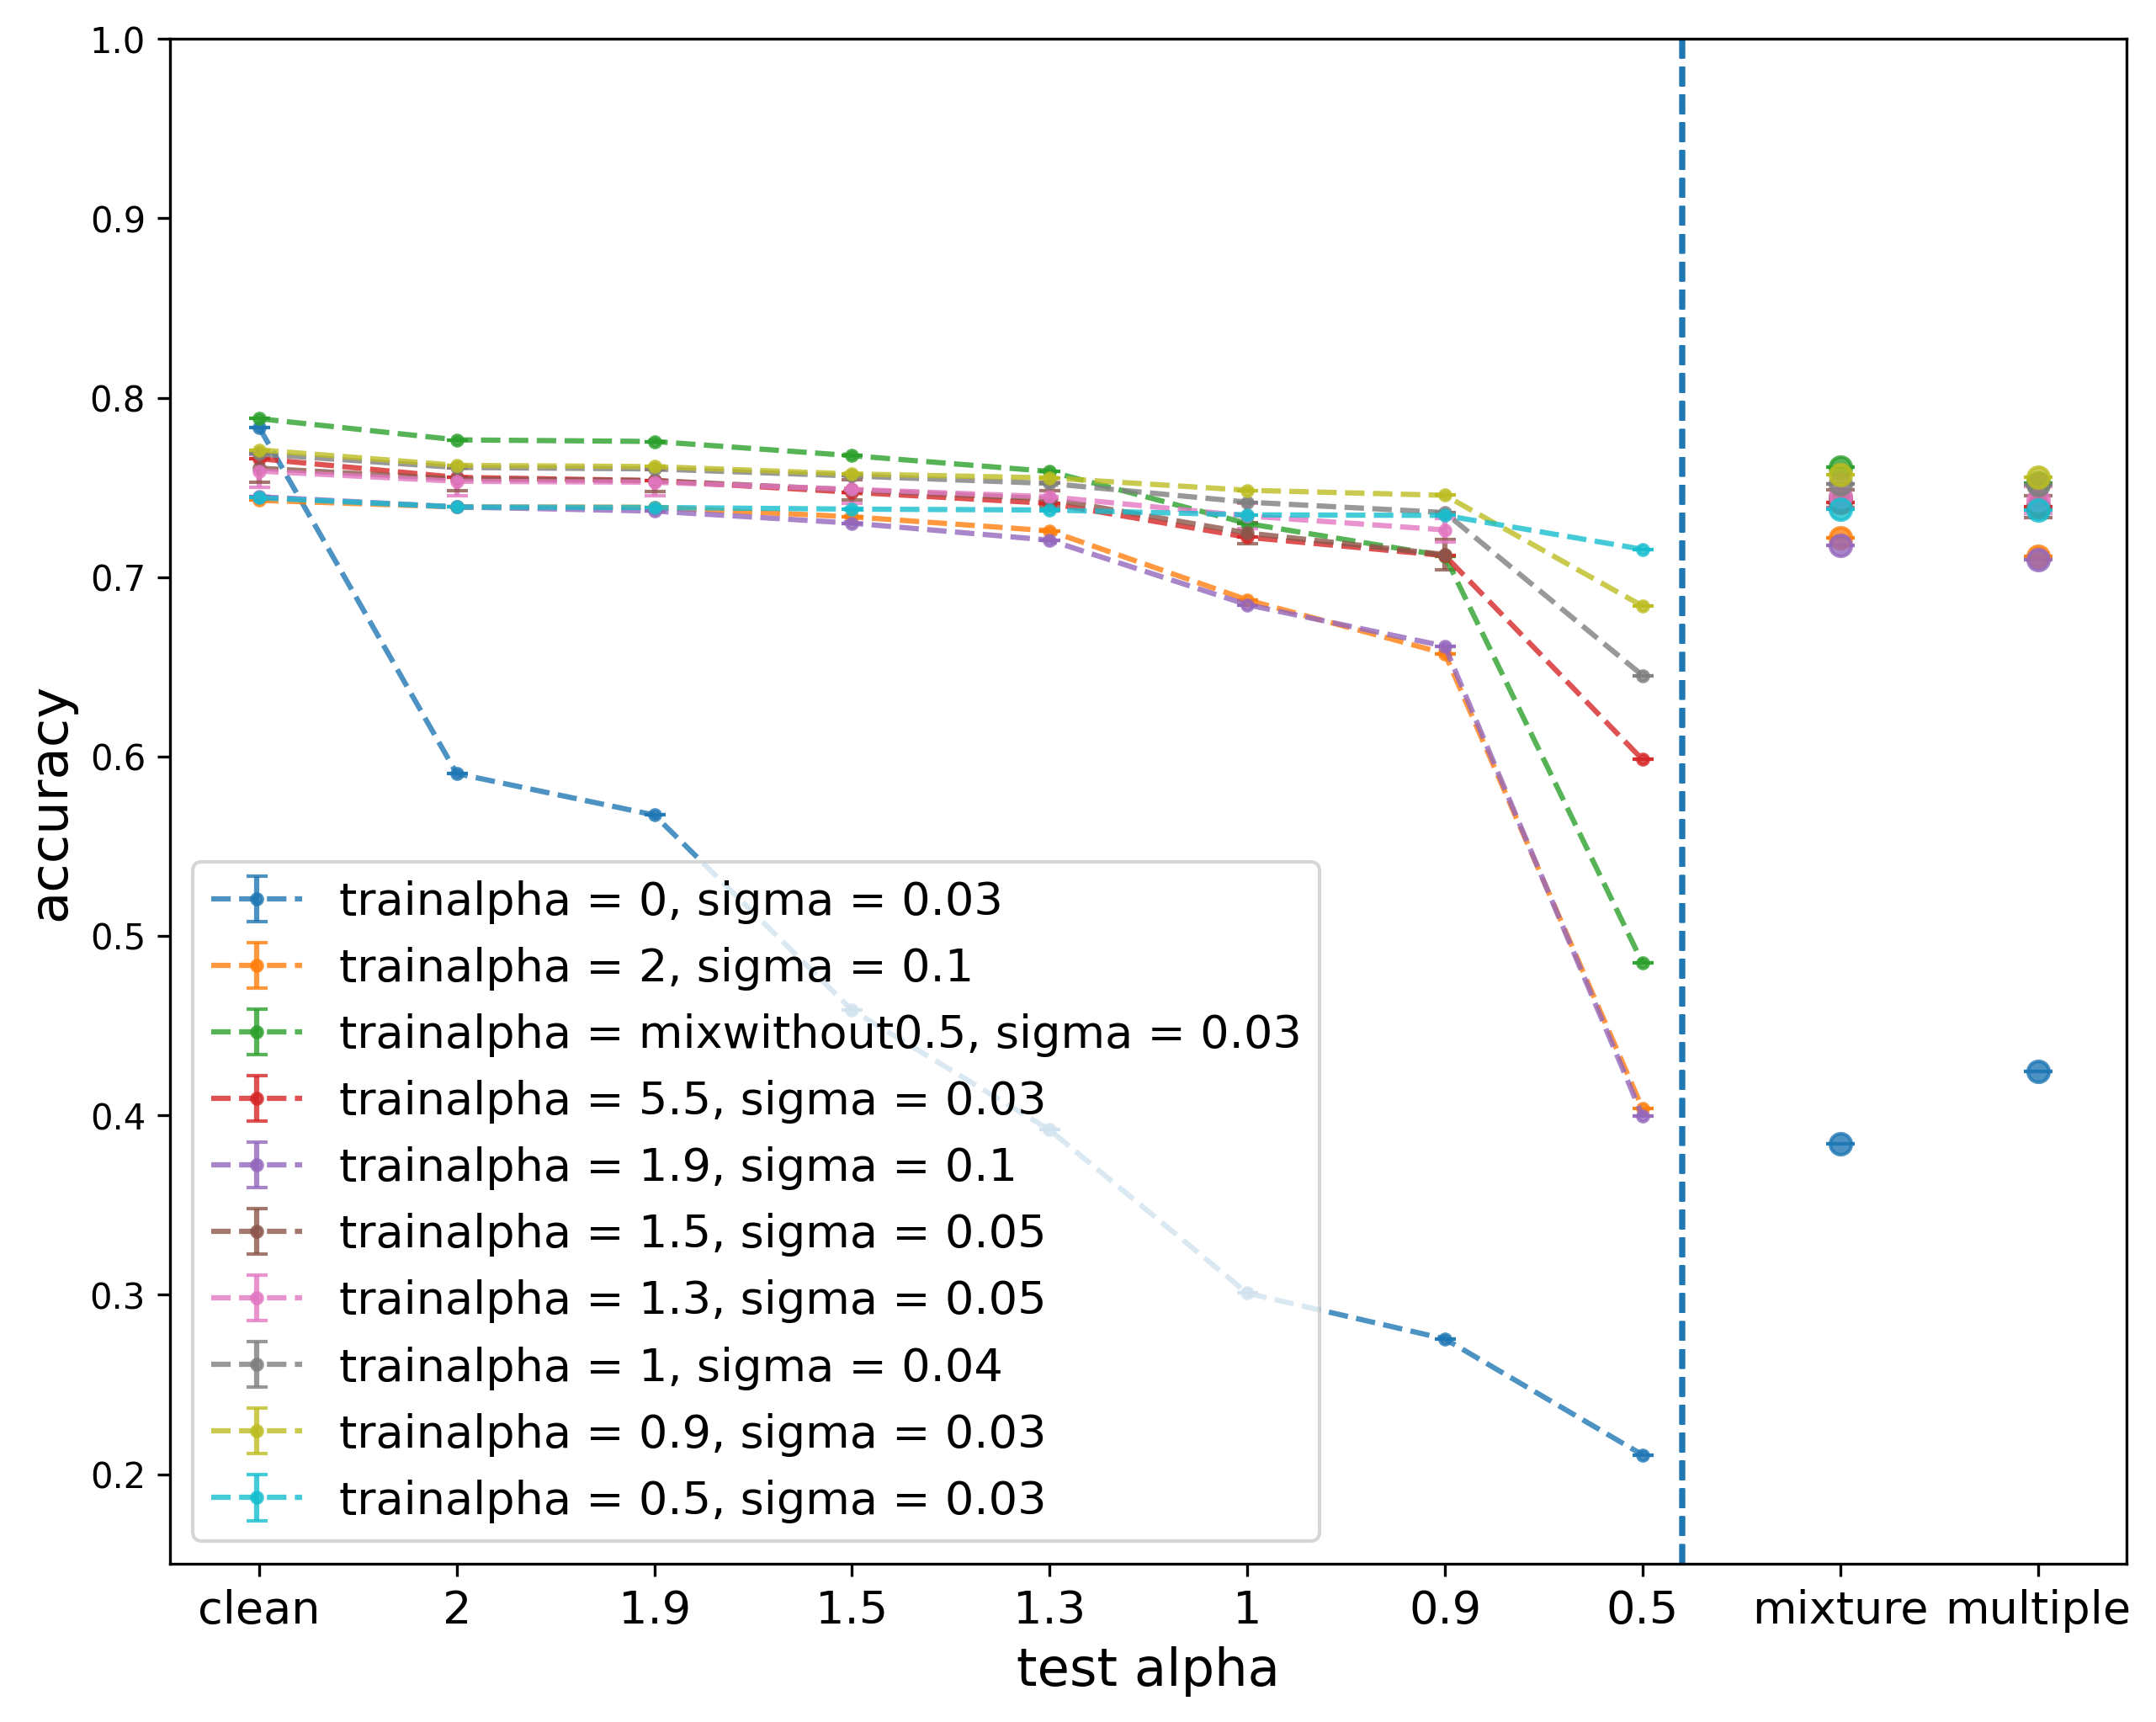

In [33]:
colors = sns.color_palette(n_colors = 10)
i=0
numfilters = 64
num_blocks=6
plt.figure(figsize=[10,8],dpi=300)
for alpha,train_sigma in [[0,0.03],[2,0.1],['mixwithout0.5',0.03],[5.5,0.03],[1.9,0.1],[1.5,0.05],[1.3,0.05],[1,0.04],[0.9,0.03],[0.5,0.03]]:
    if train_sigma == 0.05:
        acc_path = './results_sigma/CIFAR10_resnet_numfilters16_b32_alpha{}_sigma{}_num_blocks6.txt'.format(alpha,train_sigma)
        f = open(acc_path, 'rb')
        try:
            acc = pickle.load(f)
        except:
            print("the file is empty, alpha={}".format(alpha))

        df = pd.DataFrame(acc)
        npdf = np.array(df)
        npdf = npdf.reshape(5,9)
        means = np.array(npdf.mean(axis=0).round(decimals=4))
        # means = means[:-1]
        # print(means)
        stds = np.array(npdf.std(axis=0).round(decimals=4))
        # stds = stds[:-1]
        x = ['mixture','multiple','clean','2', '1.9', '1.5', '1.3', '1', '0.9']
        labels = 'trainalpha = {}, sigma = {}'.format(alpha,train_sigma)
        plt.errorbar(x[2:],means[2:],yerr=stds[2:],capsize=3,fmt='--.',alpha=0.8,color = colors[i],label =labels)
        # plt.axvline(x.index('0.5')-2+0.2,linestyle='--')
        # plt.plot(x[:2],means[:2],'o',color=color)
        # plt.fill_between([x.index('multiple')+8-0.5,x.index('multiple')+8+0.5], means[1]-stds[1], means[1]+stds[1], color=color, alpha=0.2)
        # plt.fill_between([x.index('mixture')+8-0.5,x.index('mixture')+8+0.5], means[0]-stds[0], means[0]+stds[0], color=color, alpha=0.2)
        plt.errorbar(x[:2],means[:2],yerr = stds[:2],fmt='o',color = colors[i],capsize=4,alpha=0.8)
        i += 1    
    else:
        acc_path = "./results_sigma/CIFAR10_resnet_numfilters16_b32_alpha{}_trainsigma{}_testsigma0.05_num_blocks6.txt".format(alpha,train_sigma)
        f = open(acc_path, 'rb')
        try:
            acc = pickle.load(f)
        except:
            print("the file is empty, alpha={}".format(alpha))

        df = pd.DataFrame(acc)
        npdf = np.array(df)
        if npdf.shape==(50,1):
            npdf = npdf.reshape(5,10)
        else:
            npdf = npdf.reshape(1,10)
        means = np.array(npdf.mean(axis=0).round(decimals=4))
        # means = means[:-1]
        mmeans = np.mean(means)
        print(mmeans)
        stds = np.array(npdf.std(axis=0).round(decimals=4))
        # stds = stds[:-1]
        x = ['mixture','multiple','clean','2', '1.9', '1.5', '1.3', '1', '0.9','0.5']
        labels = 'trainalpha = {}, sigma = {}'.format(alpha,train_sigma)
        plt.errorbar(x[2:],means[2:],yerr=stds[2:],capsize=3,fmt='--.',alpha=0.8,color = colors[i],label =labels)
        plt.axvline(x.index('0.5')-2+0.2,linestyle='--')
        # plt.plot(x[:2],means[:2],'o',color=color)
        # plt.fill_between([x.index('multiple')+8-0.5,x.index('multiple')+8+0.5], means[1]-stds[1], means[1]+stds[1], color=color, alpha=0.2)
        # plt.fill_between([x.index('mixture')+8-0.5,x.index('mixture')+8+0.5], means[0]-stds[0], means[0]+stds[0], color=color, alpha=0.2)
        plt.errorbar(x[:2],means[:2],yerr = stds[:2],fmt='o',color = colors[i],capsize=4,alpha=0.8)
        i += 1    
    
plt.xticks(fontsize=13 )
plt.ylim([0.15, 1])
plt.xlabel("test alpha",fontsize=15)#横坐标名字
plt.ylabel("accuracy",fontsize=15)#纵坐标名字
plt.legend(loc=0,fontsize=13)#图例
# plt.title('{} ({}) \n numbers of blocks = {}, numbers of filters = {}'.format(dataset, network,num_blocks,numfilters))
# plt.savefig('../xq_results_robustness/0812figure/ecg20all_numfilters{}_numbers of blocks{}.png'.format(numfilters,num_blocks),bbox_inches='tight')
plt.show()